In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Data**

In [7]:
data_train=pd.read_csv("../datasets/train.csv")
# data_test=pd.read_csv("../datasets/test.csv")     
# print(data_train.shape,data_test.shape)

(103904, 25) (25976, 25)


In [8]:
data=pd.concat([data_train],ignore_index=True)
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# **Understanding Data**

In [9]:
data.shape

(129880, 25)

In [10]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [11]:
data_cleaned=data.drop(['Unnamed: 0','id'],axis=1)
data_cleaned.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [12]:
data_cleaned.shape

(129880, 23)

In [13]:
data_cleaned.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

# **Handling Missing Values**

> Many machine learning algorithms fail if the dataset contains missing values. However, algorithms like K-nearest and Naive Bayes support data with missing values. You may end up building a biased machine learning model, leading to incorrect results if the missing values are not handled properly.

In [14]:
#Filling Missing Value with linear interpolation
data_cleaned['Arrival Delay in Minutes']=data_cleaned['Arrival Delay in Minutes'].interpolate(method='linear')

In [15]:
for i in data_cleaned:
  if data_cleaned[i].isnull().sum()>0:
    print(f"Null Value Exist in {i}")
print("No Null Values remained in the Dataset")

No Null Values remained in the Dataset


# **Categorical Data Encoding**

> Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [16]:
encoded_need=[]
for i in data_cleaned.columns:
  if data_cleaned[i].dtype=='object':
    print(f"Unique values of '{i}' is {data_cleaned[i].unique()}")
    encoded_need.append(i)
print("Categorical values exist in the columns : ",encoded_need)

Unique values of 'Gender' is ['Male' 'Female']
Unique values of 'Customer Type' is ['Loyal Customer' 'disloyal Customer']
Unique values of 'Type of Travel' is ['Personal Travel' 'Business travel']
Unique values of 'Class' is ['Eco Plus' 'Business' 'Eco']
Unique values of 'satisfaction' is ['neutral or dissatisfied' 'satisfied']
Categorical values exist in the columns :  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


**Creating Barplot for the features which require encoding**

In [17]:
plot=[]
for i in range(2):
  for j in range(3):
    plot.append([i,j])
print(plot)

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]


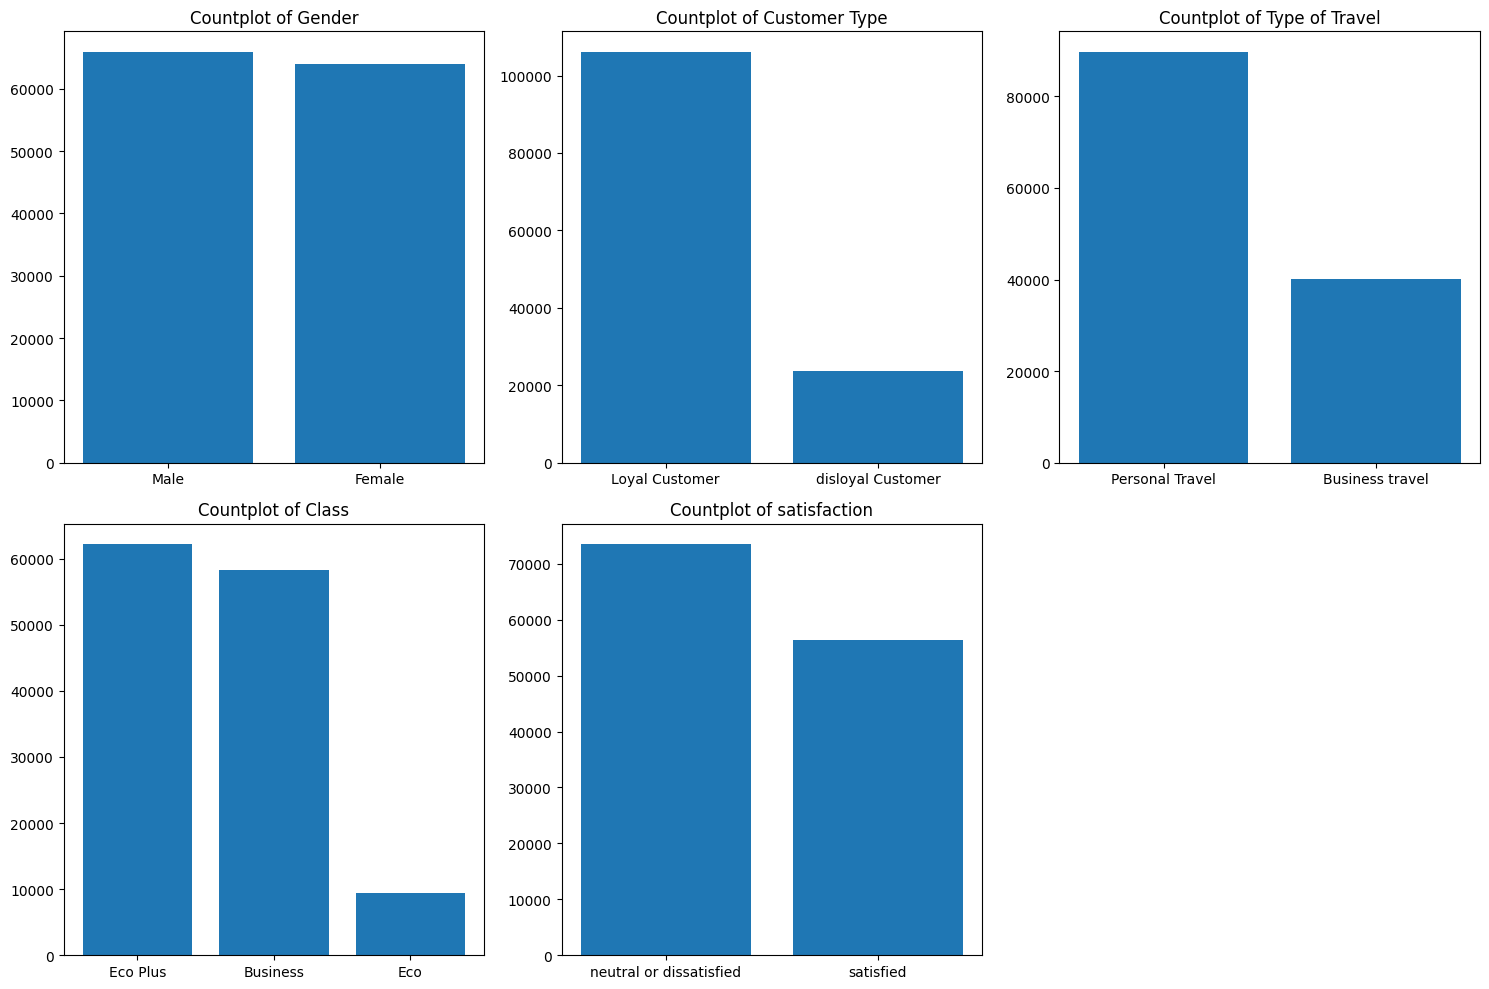

In [18]:
fig,ax=plt.subplots(2, 3, figsize=(15, 10))
for j in range(0,len(encoded_need)):
  for idx,(i,k) in enumerate(plot):
    ax[i,k].bar(list(data_cleaned[encoded_need[j]].unique()),list(data_cleaned[encoded_need[j]].value_counts()))
    ax[i,k].set_title(f'Countplot of {encoded_need[j]}')
    plot.remove([i,k])
    break
# Remove the empty subplot
fig.delaxes(ax[1, 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [20]:
data_transformed=data_cleaned.copy()

In [21]:
for i in encoded_need:
  data_transformed[i]=label_encoder.fit_transform(data_cleaned[i])

In [22]:
for i in encoded_need:
  print(f"Values of {i} encoded from  {data_cleaned[i].unique()} to this : {data_transformed[i].unique()}")

Values of Gender encoded from  ['Male' 'Female'] to this : [1 0]
Values of Customer Type encoded from  ['Loyal Customer' 'disloyal Customer'] to this : [0 1]
Values of Type of Travel encoded from  ['Personal Travel' 'Business travel'] to this : [1 0]
Values of Class encoded from  ['Eco Plus' 'Business' 'Eco'] to this : [2 0 1]
Values of satisfaction encoded from  ['neutral or dissatisfied' 'satisfied'] to this : [0 1]


**Seperating Features from the dataset**

In [23]:
features=data_transformed.iloc[:,:-1]
features.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0


# **Finding Correlation Among the Features**

> Features that are perfectly correlated to each other, with a high correlation coefficient, bring no new information to a dataset but do add to the complexity. So naturally, we would want to drop one of the two features that hold the same information

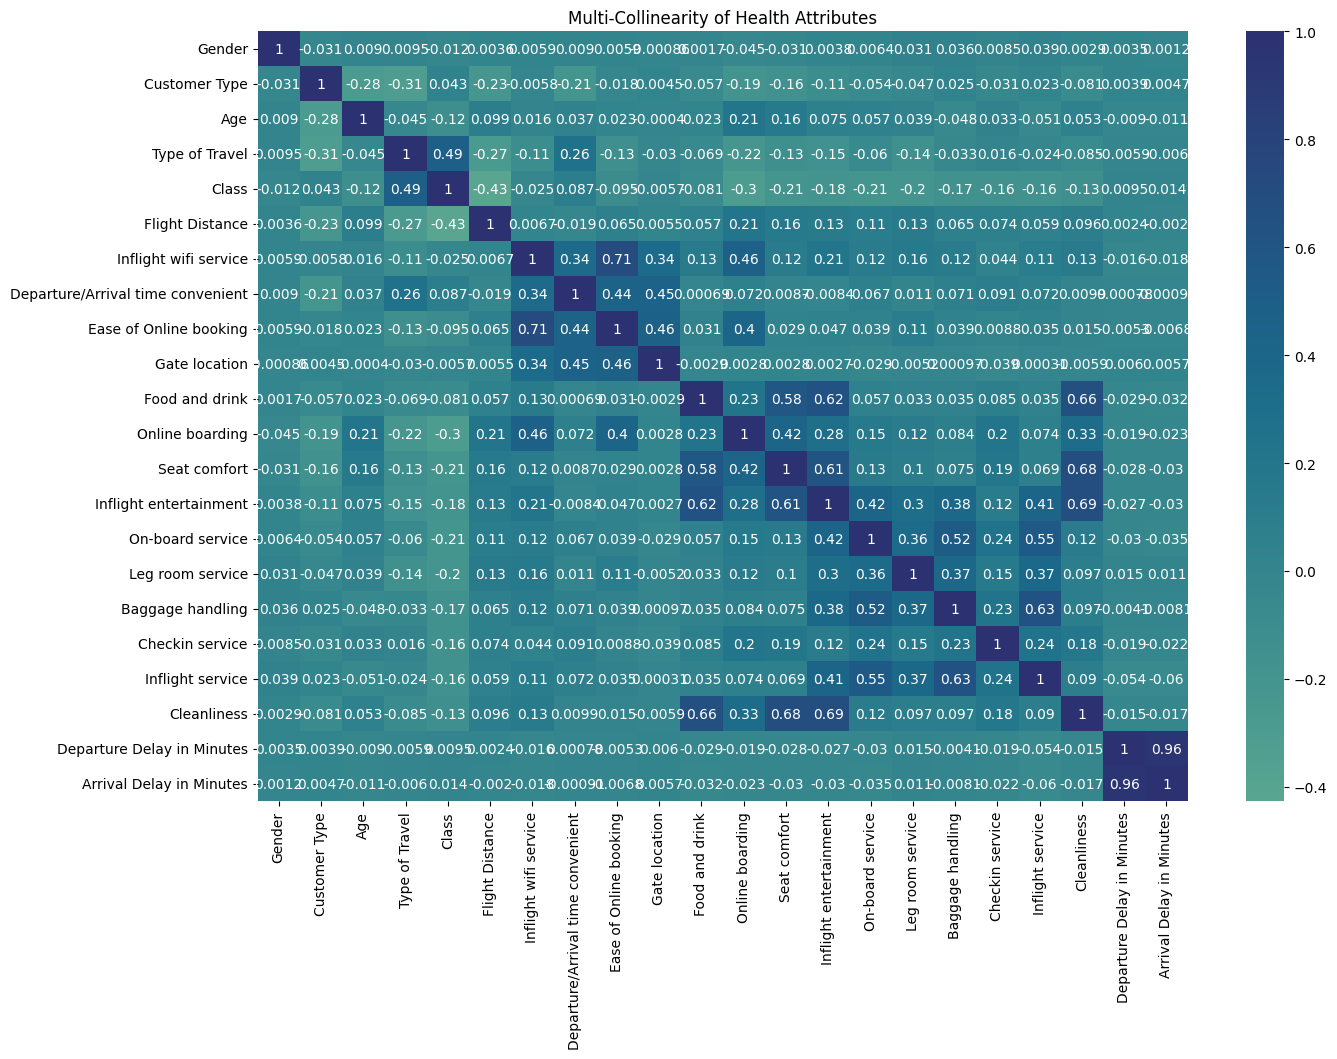

In [24]:
#printing correlation-matrix of the features of the dataset
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(features.corr(), center=0, cmap='crest',annot=True)
ax.set_title('Multi-Collinearity of Health Attributes')
plt.show()

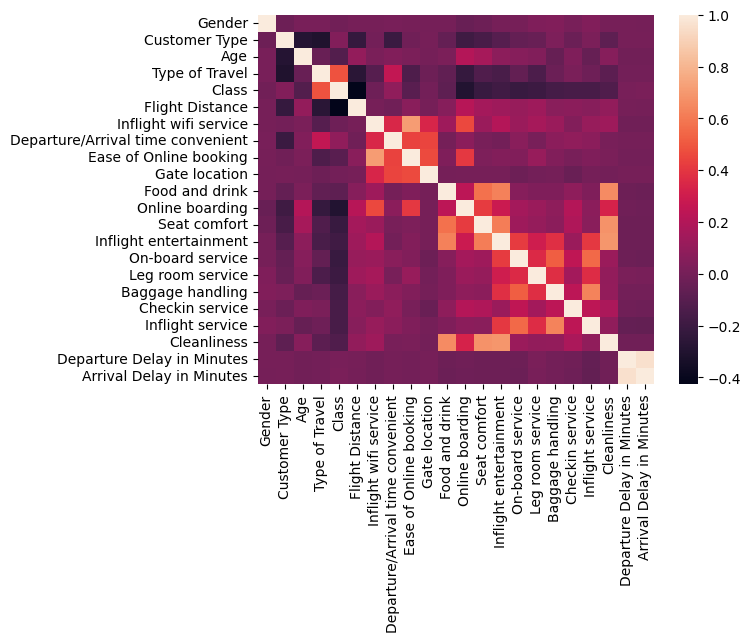

In [25]:
sns.heatmap(features.corr())
plt.show()

# **Removing Highly Correlated Features**

**Finding Highly correlated features**

In [26]:
def correlation(df,threshold):
  correlated_cols=set()
  corr_mat=df.corr()
  for i in range(len(corr_mat.columns)):
    for j in range(i):
      if abs(corr_mat.iloc[i,j])>threshold:
        col=corr_mat.columns[i]
        correlated_cols.add(col)
  return correlated_cols

In [27]:
corr_feature=correlation(features,0.6)
corr_feature

{'Arrival Delay in Minutes',
 'Cleanliness',
 'Ease of Online booking',
 'Inflight entertainment',
 'Inflight service'}

In [28]:
features.drop(labels=corr_feature,axis=1,inplace=True)
print(f"After removing highly correlated features,  shape of Features set is : {features.shape}")

After removing highly correlated features,  shape of Features set is : (129880, 17)


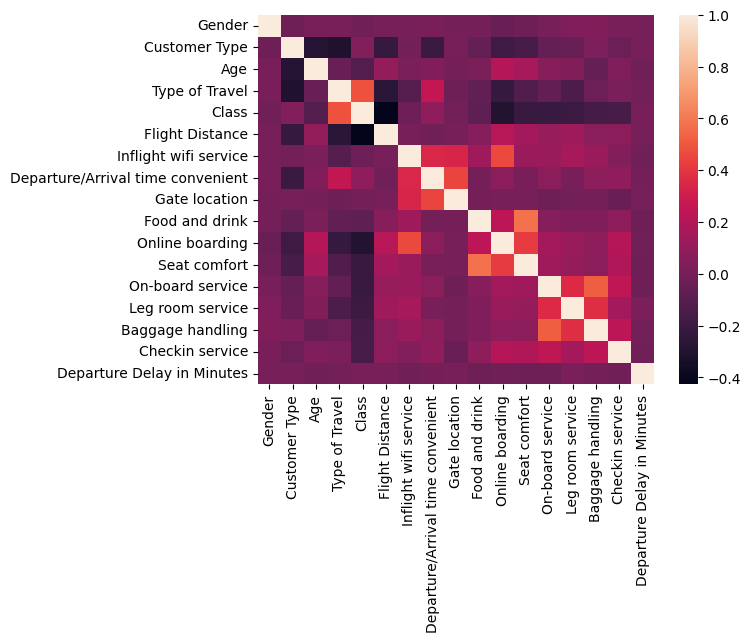

In [29]:
sns.heatmap(features.corr())
plt.show()

In [30]:
print(f"Final features will be used for prediction : {list(features.columns)} and Length of features :{len(list(features.columns))}")

Final features will be used for prediction : ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Departure Delay in Minutes'] and Length of features :17


# **Scaling the data to fit in the model**

> Scaling your data in machine learning (ML)is important because many algorithms use the Euclidean distance between two data points in their computations/derivations, which is sensitive to the scale of the variables. If one variable is on a much larger scale than another, that variable will dominate the distance calculation, and the algorithm will be affected by that variable more than the other. Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm. 

In [31]:
for i in features.columns:
  a=len(list(features[i].unique()))
  print(f"Unique value length of '{i}' is: {a}")

Unique value length of 'Gender' is: 2
Unique value length of 'Customer Type' is: 2
Unique value length of 'Age' is: 75
Unique value length of 'Type of Travel' is: 2
Unique value length of 'Class' is: 3
Unique value length of 'Flight Distance' is: 3821
Unique value length of 'Inflight wifi service' is: 6
Unique value length of 'Departure/Arrival time convenient' is: 6
Unique value length of 'Gate location' is: 6
Unique value length of 'Food and drink' is: 6
Unique value length of 'Online boarding' is: 6
Unique value length of 'Seat comfort' is: 6
Unique value length of 'On-board service' is: 6
Unique value length of 'Leg room service' is: 6
Unique value length of 'Baggage handling' is: 5
Unique value length of 'Checkin service' is: 6
Unique value length of 'Departure Delay in Minutes' is: 466


In [32]:
scaling_need=[]
for i in features.columns:
  a=len(list(features[i].unique()))
  if a>10:
    scaling_need.append(i)
print(scaling_need)

['Age', 'Flight Distance', 'Departure Delay in Minutes']


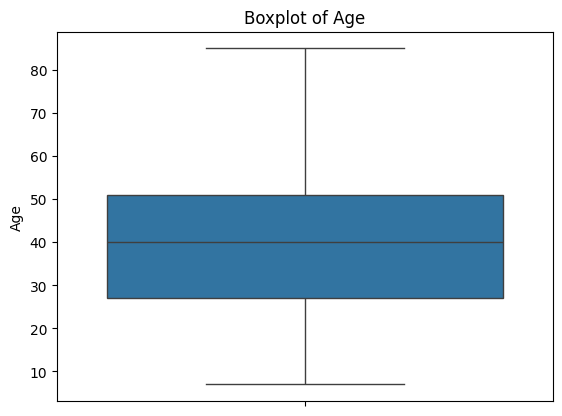

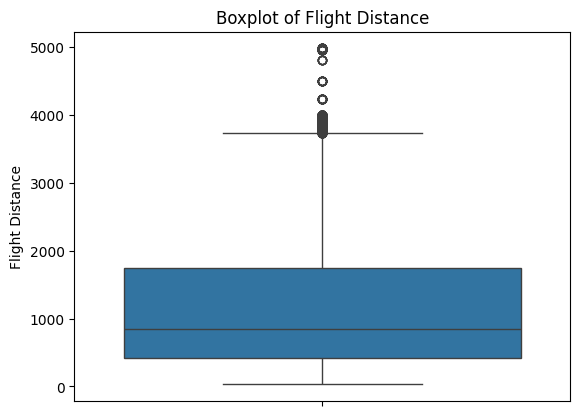

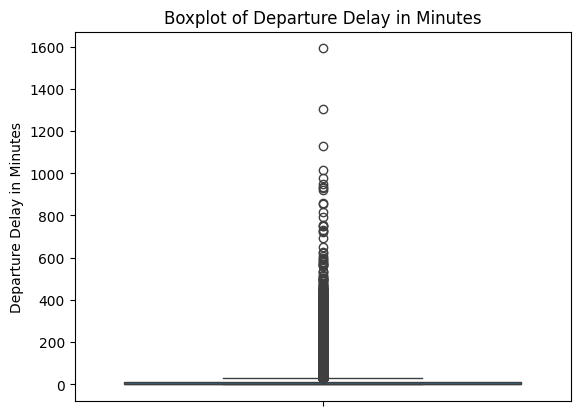

In [33]:
import seaborn as sns
for i in scaling_need:
  sns.boxplot(features[i])
  plt.title(f'Boxplot of {i}')
  plt.show()
  print()

**Too much outliers present in the flight distance and departure delay in minutes**

In [34]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(1,5))

In [35]:
# from sklearn.preprocessing import RobustScaler
# scalar=RobustScaler()

In [36]:
features[scaling_need]=scalar.fit_transform(features[scaling_need])

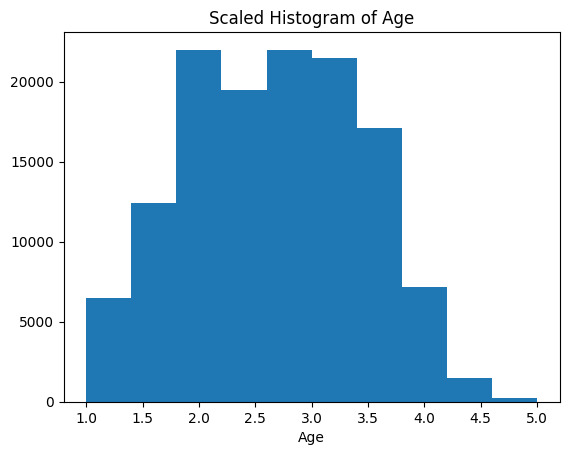

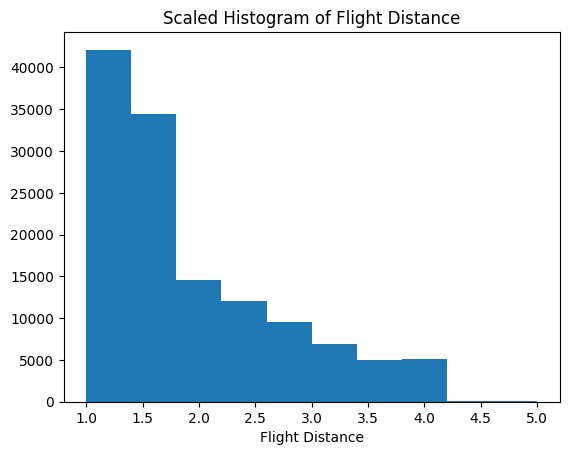

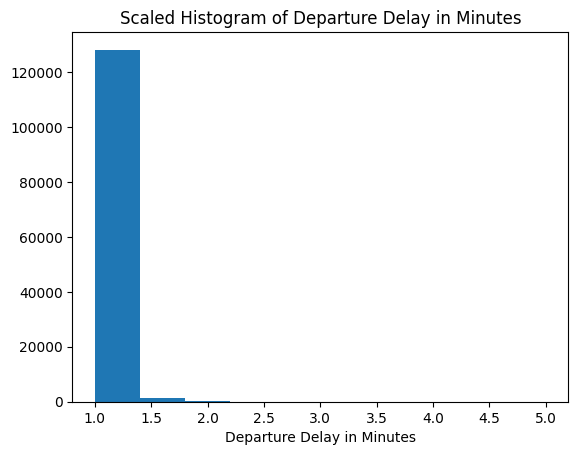

In [37]:
for i in scaling_need:
    plt.hist(features[i])
    plt.title(f'Scaled Histogram of {i}')
    plt.xlabel(i)
    plt.show()
    print()

# **Train-Test Splitting**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
target=data_transformed.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (103904, 17) and test set is :(25976, 17)


# **Logistic Regression**

> Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category.

In [40]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score

**Prediction accuracy and summary**

In [42]:
y_pred_lr=model_lr.predict(X_test)
accuracy=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 87.41 % .
Classification Report is : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14622
           1       0.87      0.84      0.85     11354

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



**Plotting Confusion Matrix for Logistic Regression**

In [43]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)

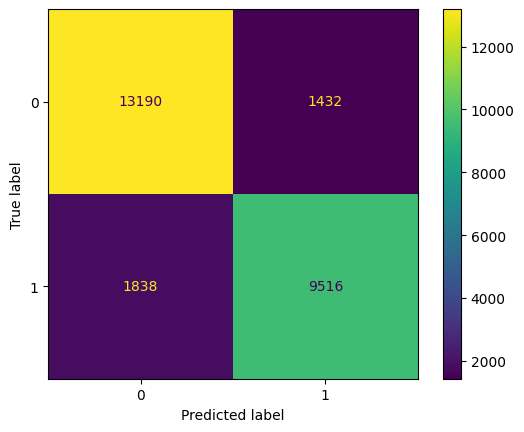

In [44]:
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

# **K-NN(K Nearest Neighbours)**

> kNN, or the k-nearest neighbor algorithm, is a machine learning algorithm that uses proximity to compare one data point with a set of data it was trained on and has memorized to make predictions. This instance-based learning affords kNN the 'lazy learning' denomination and enables the algorithm to perform classification or regression problems.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=5)

In [46]:
#fit the model with trained data
model_knn.fit(X_train,y_train)

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 92.9 % .
Classification Report is : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     14622
           1       0.94      0.89      0.92     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



**Plotting Confusion Matrix for KNN**

In [47]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_lr.classes_)

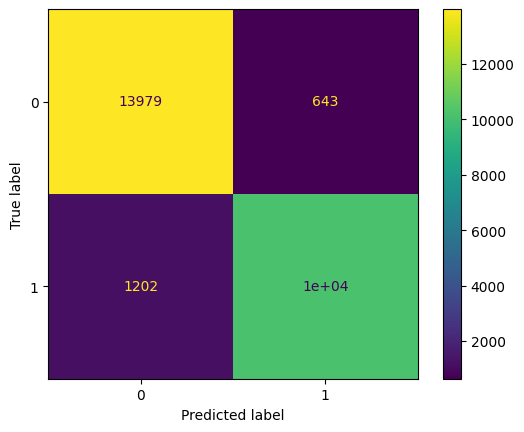

In [48]:
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

# **Naive-Bayes**

> Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

In [49]:
from sklearn.naive_bayes import MultinomialNB

model_naive=MultinomialNB()

In [50]:
#fit the model with trained data
model_naive.fit(X_train,y_train)

#Predict the accuracy of the model
y_pred_naive=model_naive.predict(X_test)

accuracy=accuracy_score(y_pred_naive,y_test)
print(f"Accuracy of Naive Bayes is : {round(accuracy*100,2)} % .")

report=classification_report(y_test,y_pred_naive)
print("Classification Report is : \n",report)

Accuracy of Naive Bayes is : 81.91 % .
Classification Report is : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     14622
           1       0.79      0.80      0.79     11354

    accuracy                           0.82     25976
   macro avg       0.82      0.82      0.82     25976
weighted avg       0.82      0.82      0.82     25976



# **Decision Tree**

> Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [51]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini', splitter='best',max_features=6,random_state=1234)

In [52]:
#fit the model with trained data
model_dt.fit(X_train,y_train)

#Predict the accuracy of the model
y_pred_dt=model_dt.predict(X_test)

accuracy=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy of Decision Tree is : {round(accuracy*100,2)} % .")

report=classification_report(y_test,y_pred_dt)
print("Classification Report is : \n",report)

Accuracy of Decision Tree is : 93.86 % .
Classification Report is : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     14622
           1       0.93      0.93      0.93     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



**Saving Decision Tree Image**

In [53]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(model_dt, out_file=None, 
                                feature_names=list(features.columns),  
                                class_names='Satisfaction',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")

ModuleNotFoundError: No module named 'graphviz'

**Plotting Confusion Matrix for most accurate model - Decision Tree**

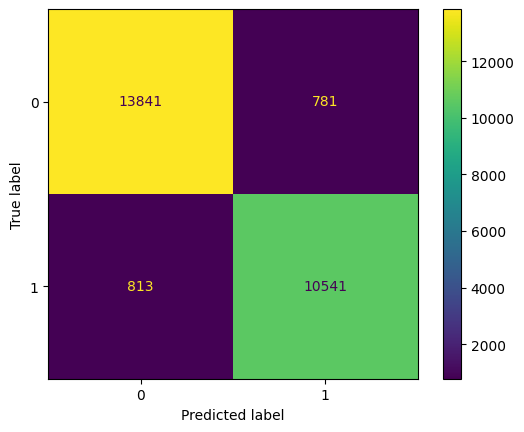

In [51]:
cm_3= confusion_matrix(y_test, y_pred_dt, labels=model_dt.classes_)
disp_3= ConfusionMatrixDisplay(confusion_matrix=cm_3,
                          display_labels=model_dt.classes_)
disp_3.plot()

# **Saving the model**

In [52]:
# saving the model
import pickle
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

In [53]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scalar, f)

# **Demo of the Applcation Website**

[https://airline-customersatisfaction.streamlit.app](http://)